In [1]:
import numpy as np
import pandas as pd
import cv2 as cv

from matplotlib.image import imread
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

In [2]:
data_path = (os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "train" + os.sep + "ModerateDemented" + os.sep )

only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]

moderate_demented = {}

df_dict = []

for image_name in only_image_names:

        image_fullpath = data_path + image_name
        image_cv = cv.imread(image_fullpath, 0) # Si ponemos 0 lo lee en blanco y negro, si no ponemos nada lo lee a color 
        image_cv = cv.resize(image_cv, (180, 180)) # Tengo que tener siempre la misma resolución para las imágenes
        #print(image_cv.shape)
        if "jpg" in image_name:
            df_dict.append({"Image":image_cv, "Label":3, "Fullpath":image_fullpath })
            moderate_demented[image_fullpath] = 3
    

In [3]:
df = pd.DataFrame(df_dict)
df.head()

,Image,Label,Fullpath
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3,c:\Users\xyang\OneDrive\Escritorio\ARCHIVOS\TH...
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3,c:\Users\xyang\OneDrive\Escritorio\ARCHIVOS\TH...
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3,c:\Users\xyang\OneDrive\Escritorio\ARCHIVOS\TH...
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3,c:\Users\xyang\OneDrive\Escritorio\ARCHIVOS\TH...
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3,c:\Users\xyang\OneDrive\Escritorio\ARCHIVOS\TH...


In [4]:
X = np.stack(np.array(df["Image"]))
X.shape

(247, 180, 180)

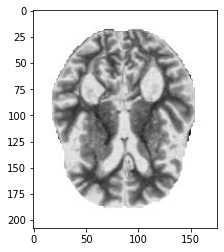

In [5]:
image = imread(df["Fullpath"][0])
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [7]:
X_train = X.reshape(247,180,180,1)
X_train.shape

(247, 180, 180, 1)

In [12]:
from keras.preprocessing.image import ImageDataGenerator


datagen  = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=[0.2,2.0])

i = 0
for batch in datagen.flow(X_train, batch_size=1,
                                save_to_dir= os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "train" , save_format='jpg'):
    i += 1
    if i > 5:
        break

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen  = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=[0.2,2.0],rescale=1./255)

i = 0
for batch in datagen.flow(X_train, batch_size=1,
                                save_to_dir='set-2', save_format='jpg'):
    i += 1
    if i > 5:
        break

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'